In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import plot_images

In [5]:
# Read the dataset
df = pd.read_csv('data/xyz_dataset.csv')
df

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18171,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18172,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18173,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Are there any null values?
df.isna().sum().sum()

0

In [12]:
# Is shape consistent with the readme?
assert df.shape[1] - 1 == 28*28 

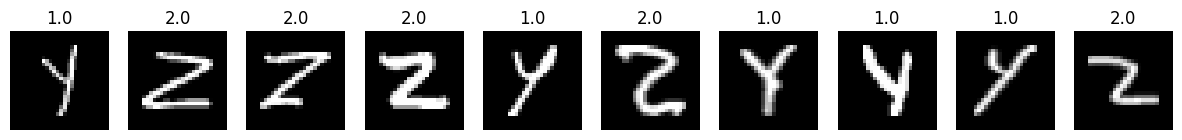

In [7]:
# Visualize random 10 images
random_indexes = np.random.choice(df.index, 10, replace=False)
images = df.iloc[random_indexes, 1:].values
labels = df.iloc[random_indexes, 0].values
plot_images(images, labels)
plt.show()

From that we can assume that label 2 -> Z, 1 -> Y, 0 -> X

In [8]:
# Check values range
unique_values = sorted(pd.unique(df.iloc[:, 1:].values.ravel()))
print(f"Values in range: [{unique_values[0]}, {unique_values[-1]}]")

Values in range: [0.0, 255.0]


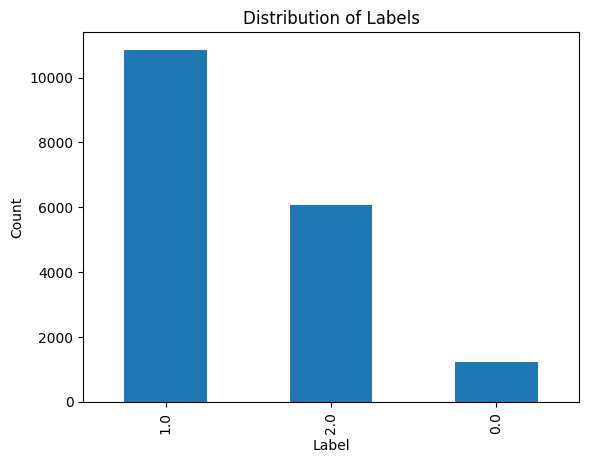

In [9]:
# Check distribution of labels
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Dataset is imbalanced

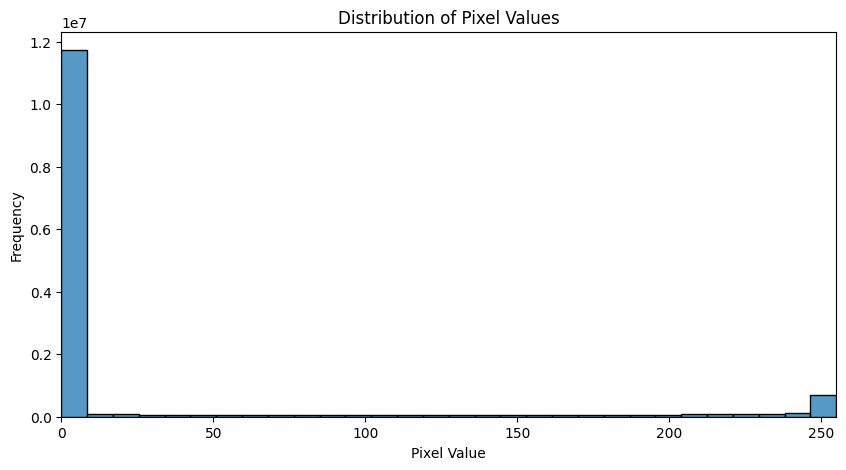

In [10]:
# Check distribution of pixel values
pixel_values = df.iloc[:, 1:].values.ravel()
plt.figure(figsize=(10, 5))
sns.histplot(pixel_values, bins=30)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.show()

Most pixels either have either a value close to 0  or 255

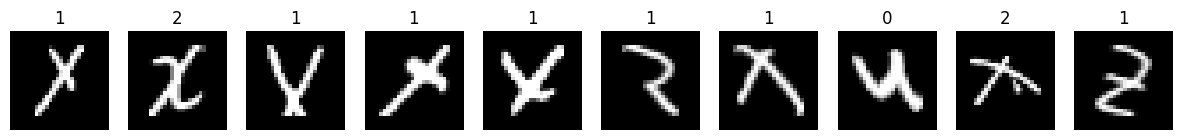

In [26]:
# plot wrongly predicted
model.eval()
wrongly_predicted = []
wrong_labels = []
correct_labels = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        mask = predicted != batch_y
        wrongly_predicted.extend(batch_X[mask].numpy())
        wrong_labels.extend(predicted[mask].numpy())
        correct_labels.extend(batch_y[mask].numpy())
wrongly_predicted = np.array(wrongly_predicted)
wrong_labels = np.array(wrong_labels)
correct_labels = np.array(correct_labels)
# Visualize the first 10 wrongly predicted images
random_indexes = np.random.choice(wrongly_predicted.shape[0], 10, replace=False)
images = wrongly_predicted[random_indexes]
labels = wrong_labels[random_indexes]
plot_images(images, labels)